<a href="https://colab.research.google.com/github/SUNPAUL97/SUNPAUL97/blob/main/TITANIC_SHIPWRECK_SURVIVAL_PREDICTION(MACHINE_LEARNING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

# OLAOJO PAUL SUNDAY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [ ]:
inclass = pd.read_csv('inclass_titanic.csv')
inclass.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Exploratory Data Analysis

<AxesSubplot:>

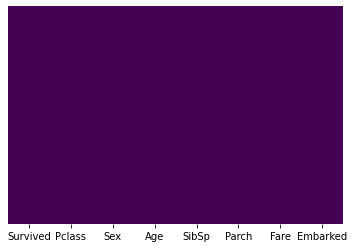

In [ ]:
#Checking if there is missing data
sns.heatmap(inclass.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

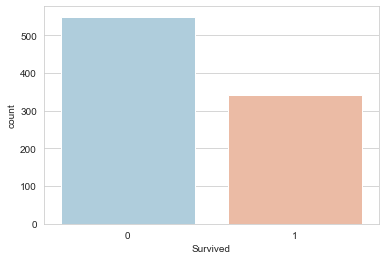

In [ ]:
# Fine no missing data
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=inclass,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

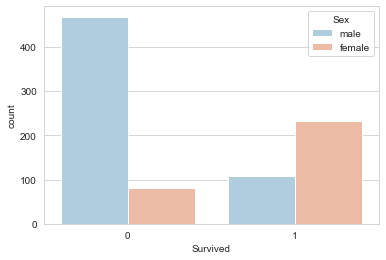

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=inclass,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

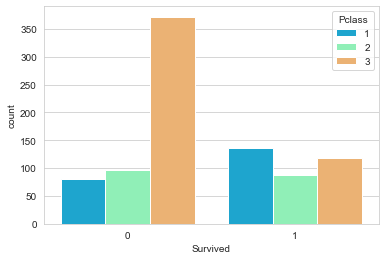

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=inclass,palette='rainbow')

C:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

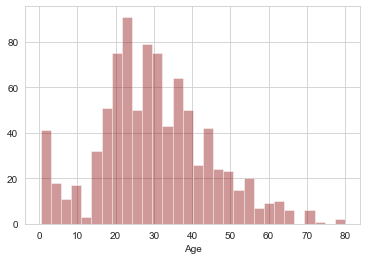

In [ ]:
sns.distplot(inclass['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

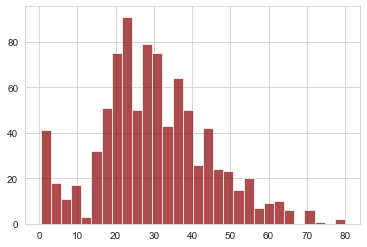

In [ ]:
inclass['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

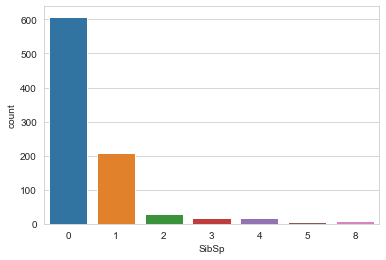

In [ ]:
sns.countplot(x='SibSp',data=inclass)

<AxesSubplot:>

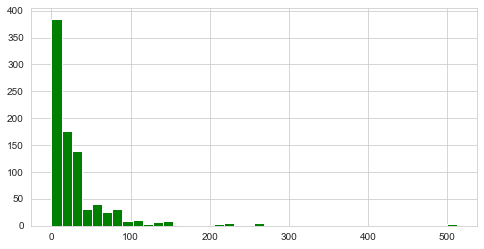

In [ ]:
inclass['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
from sklearn.metrics import f1_score
#f1_score(y_test, predictions)

In [ ]:
inclass.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
inclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
sex = pd.get_dummies(inclass['Sex'],drop_first=True)
embark = pd.get_dummies(inclass['Embarked'],drop_first=True)

In [ ]:
inclass.drop(['Sex','Embarked'],axis=1,inplace=True)

In [ ]:
inclass = pd.concat([inclass,sex,embark],axis=1)

In [ ]:
inclass.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inclass.drop('Survived',axis=1), 
                                                    inclass['Survived'], test_size=0.30, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\sunpaul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
accuracy_score(y_test,predictions)

0.8097014925373134

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7582938388625592

In [ ]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks ( [0.5, 1.5], label)
    plt.yticks ( [0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

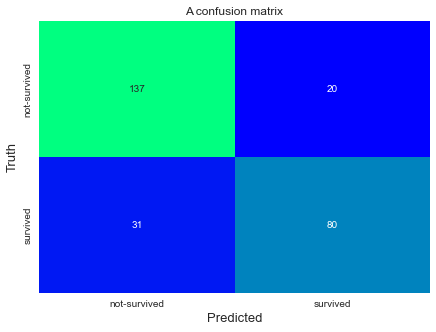

In [ ]:
ConfusionMatrix(y_test, predictions, label= ["not-survived", "survived"])

In [ ]:
recall_score(y_test,predictions)

0.7207207207207207

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = randomforestmodel.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.7910447761194029

In [ ]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       157
           1       0.75      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



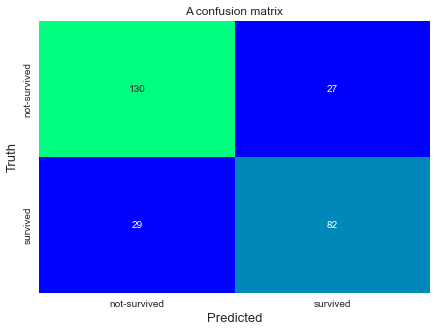

In [ ]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-survived", "survived"])

In [ ]:
from sklearn.metrics import f1_score
metrics.f1_score(y_test, rf_prediction)

0.7454545454545455

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier(n_estimators= 150)
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
rfc_prediction = randomforestmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, rfc_prediction)

0.7835820895522388

# OLAOJO PAUL
# AI+ID: DSN/AIPlus

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, rfc_prediction)

In [ ]:
print(metrics.classification_report(y_test, rfc_prediction))

In [ ]:
print('Parameters currently in use:\n')
mod_details = randomforestmodel.get_params()
for i in mod_details:
    print(i," :", mod_details[i])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for i in random_grid:
    print(i," :", random_grid[i])

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(random_state= 7)
base_model.fit(X_train, y_train)
bm_predictions = base_model.predict(X_test)
base_accuracy = metrics.accuracy_score(y_test, bm_predictions)
print("Base model Accuracy:", base_accuracy)

best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
best_predictions = best_random.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_predictions)
print("Best model Accuracy:", base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, bm_predictions)

In [ ]:
metrics.accuracy_score(y_test, bm_predictions)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)